In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


In [3]:
X,y=make_classification(n_samples=1000,n_classes=2,random_state=1)


In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [7]:
dummy_model_prob=[0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [8]:
model=LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
model_prob=model.predict_proba(X_test)


In [10]:
model_prob=model_prob[:,1]

In [11]:
model_prob

array([9.99041225e-01, 9.68866009e-02, 4.89372036e-01, 8.10046974e-01,
       1.12426807e-01, 4.39872005e-01, 8.29460814e-01, 7.13822440e-01,
       8.87707883e-01, 8.67973855e-01, 5.43854787e-04, 8.31200361e-01,
       1.91030219e-01, 5.39053079e-01, 7.28060254e-01, 8.23507048e-01,
       9.38587042e-01, 6.38367304e-01, 1.10159811e-01, 2.41034347e-01,
       1.15857322e-02, 4.90154702e-01, 8.88085107e-01, 9.97948102e-01,
       1.36945498e-01, 1.32643249e-02, 6.45087847e-01, 9.69507009e-01,
       3.99070556e-02, 2.38152731e-02, 3.69213417e-01, 3.40314906e-02,
       2.29858043e-01, 9.57101721e-01, 5.44958479e-01, 6.56791269e-01,
       1.52123558e-02, 2.93410161e-02, 7.80393330e-01, 2.99088014e-02,
       9.28398422e-01, 8.43395917e-01, 1.60117892e-02, 5.78395703e-04,
       6.61496895e-02, 6.69762422e-02, 9.97948178e-01, 6.55755704e-01,
       8.94036983e-01, 6.07000680e-02, 2.10340754e-02, 3.23954283e-02,
       1.03560315e-01, 5.44021349e-02, 5.64730236e-01, 9.87033757e-01,
      

In [13]:
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)


0.5
0.9108885464817668


In [21]:
dummy_fpr,dummy_tpr,_=roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,threshold=roc_curve(y_test,model_prob)

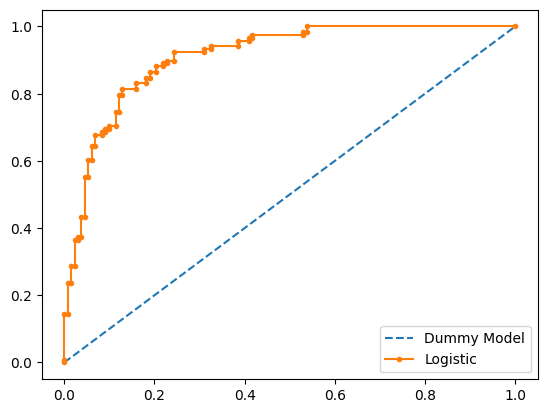

In [22]:
pyplot.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy Model')
pyplot.plot(model_fpr,model_tpr,marker='.',label='Logistic')
pyplot.legend()
pyplot.show()

In [23]:
threshold

array([           inf, 9.99738397e-01, 9.87033757e-01, 9.86362468e-01,
       9.57744551e-01, 9.57101721e-01, 9.45385188e-01, 9.40463485e-01,
       9.28300276e-01, 9.27356342e-01, 9.25607881e-01, 9.23728474e-01,
       8.94744248e-01, 8.94036983e-01, 8.43395917e-01, 8.38396411e-01,
       8.28791784e-01, 8.26684852e-01, 8.08489957e-01, 8.06352720e-01,
       7.80393330e-01, 7.63976766e-01, 7.63705186e-01, 7.63537905e-01,
       7.58496683e-01, 7.55347574e-01, 7.52623720e-01, 7.48020931e-01,
       7.23488083e-01, 7.23238629e-01, 6.74619385e-01, 6.56791269e-01,
       6.55162225e-01, 6.26882105e-01, 5.99962989e-01, 5.57931518e-01,
       5.39053079e-01, 5.14219160e-01, 5.05342549e-01, 4.96278090e-01,
       4.90154702e-01, 4.85201910e-01, 4.69275954e-01, 4.50983178e-01,
       4.46563018e-01, 4.39872005e-01, 4.24245353e-01, 3.24715881e-01,
       3.12906913e-01, 3.06694053e-01, 3.01325247e-01, 2.10358834e-01,
       2.06296724e-01, 1.91030219e-01, 1.69877066e-01, 1.42771985e-01,
      

In [6]:
class UserMainCode(object):
    @classmethod
    def stringQuery(cls, input1, input2, input3, input4):
        """
        Calculates the minimum number of operations to make each substring a palindrome.
        An operation is a single character change.
        """
        
        prefix_freq = [[0] * 26 for _ in range(input2 + 1)]
        
        for i in range(input2):
            for j in range(26):
                prefix_freq[i + 1][j] = prefix_freq[i][j]
            
            char_index = ord(input1[i]) - ord('a')
            prefix_freq[i + 1][char_index] += 1
        
        results = []
        
        for pair in input3:
            L, R = pair[0], pair[1]
            
            odd_count = 0
            for j in range(26):
                count = prefix_freq[R][j] - prefix_freq[L - 1][j]
                if count % 2 != 0:
                    odd_count += 1
            
            if odd_count <= 1:
                results.append(0)
            else:
                results.append(odd_count - 1)
                
        return results

# Example Usage:
# You can replace these inputs with your own to test the function.

input_string = "abacaba"
length_of_string = len(input_string)
queries = [[1, 4], [2, 6], [3, 5]]
number_of_queries = len(queries)

# Call the method with the provided inputs
result = UserMainCode.stringQuery(input_string, length_of_string, queries, number_of_queries)

print(f"Input:")
print(f"  String: '{input_string}'")
print(f"  Queries: {queries}")
print(f"  Length of string: {length_of_string}")
print(f"  Number of queries: {number_of_queries}")
print("\nOutput:")
print(f"  {result}")

Input:
  String: 'abacaba'
  Queries: [[1, 4], [2, 6], [3, 5]]
  Length of string: 7
  Number of queries: 3

Output:
  [1, 0, 0]
